### Implementing T-SNE and visualizing the MNIST dataset.

In [1]:
# imports 
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
np.random.seed(3)

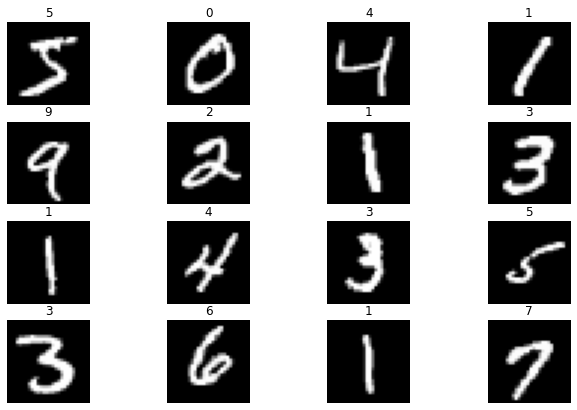

In [2]:
# Accessing the pickle file
with open('mnist.pkl','rb') as f:
    mnist=pickle.load(f)
plt.figure(figsize=(11,7))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(mnist['images'][i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

In [3]:
# Use PCA to extract first 32 components
model_pca=PCA(n_components=32)
mnist_pca=model_pca.fit(mnist['images'].reshape((-1,28**2)))

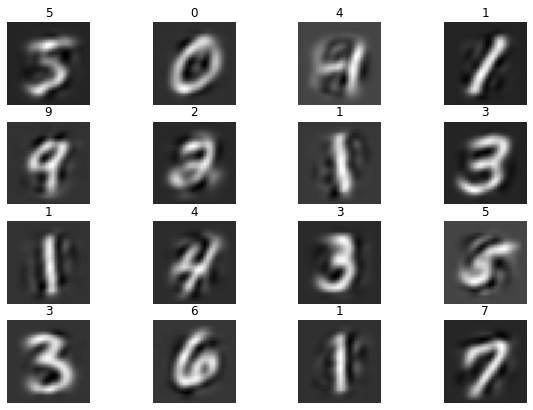

In [4]:
# Visualizing the effect of PCA 
mnist_32comp = model_pca.transform(mnist['images'].reshape((-1, 28 ** 2)))
mnist_32comp_vis = model_pca.inverse_transform(mnist_32comp)
mnist_32comp_vis = mnist_32comp_vis.reshape((-1, 28, 28))
plt.figure(figsize=(10,7))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(mnist_32comp_vis[i], cmap='gray')
    plt.title(mnist['labels'][i])
    plt.axis('off')
plt.show()

#### lost some clarity in the images, for the most part, the numbers are still clearly visible due to the dimension reduction process.

In [5]:
# Apply TSNE to reduced dataset
model_tsne=TSNE(random_state=0,verbose=1)
model_tsne

TSNE(random_state=0, verbose=1)

In [6]:
mnist_tsne = model_tsne.fit_transform(mnist_32comp)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 5.115s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 281.018808
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.210823
[t-SNE] KL divergence after 1000 iterations: 1.693060


In [7]:
# Visualize the shape of returned dataset
mnist_tsne.shape

(10000, 2)

#### I reduced shape to 2 dimensions for visualization so create a scatter plot of 2-D data produced by model

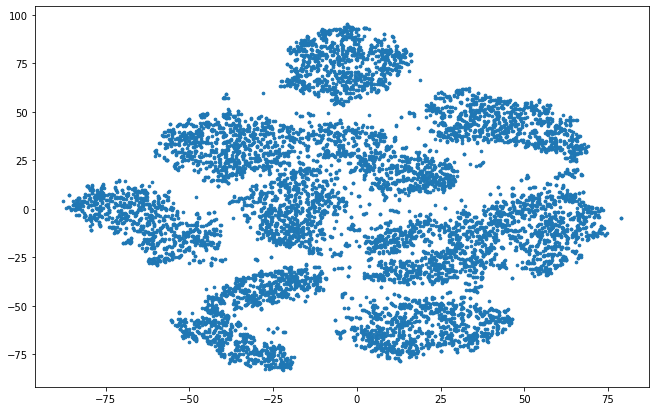

In [8]:
plt.figure(figsize=(11,7))
plt.scatter(mnist_tsne[:,0],mnist_tsne[:,1],s=7)
plt.show()

#### In the preceeding figure ,some clusters are getting formed, they are for each individual digit, some clusters are connected together while some are at a distance separated by white space. Some relationship is between & within these clusters.

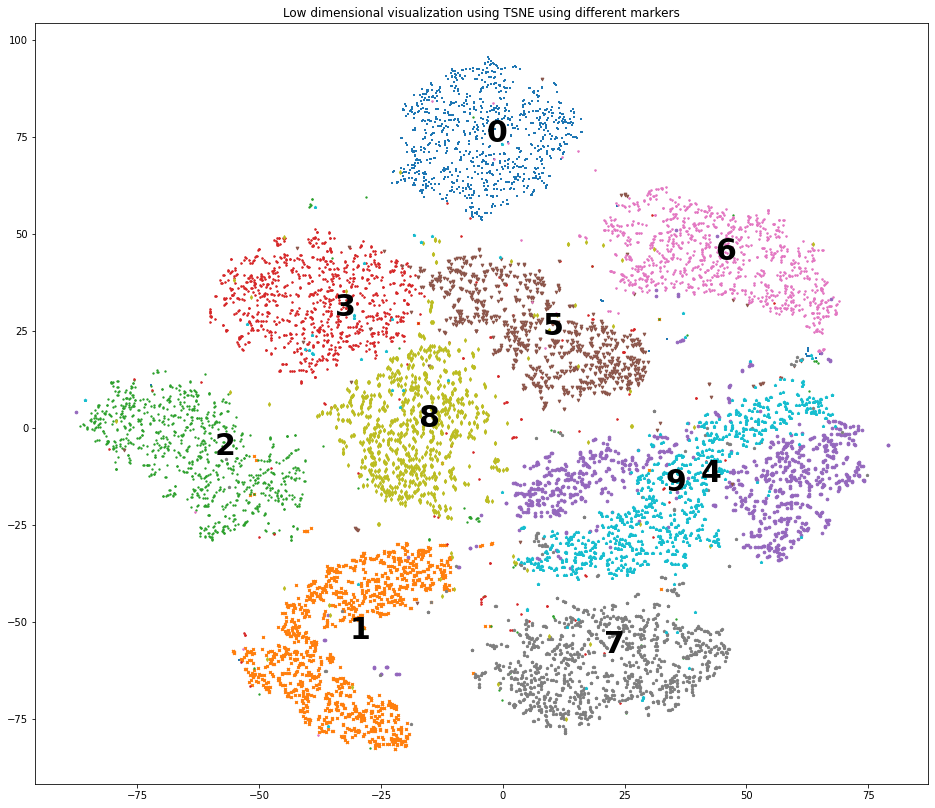

In [13]:
# Use the markers to visualize each digit
marker=['+','x','.','4','o','v','1','p','d','*']
plt.figure(figsize=(16,14))
plt.title('Low dimensional visualization using TSNE using different markers')
for i in range(10):
    selects=mnist_tsne[mnist['labels']==i]
    plt.scatter(selects[:,0],selects[:,1],marker=marker[i],s=7)
    x,y=selects.mean(axis=0)
    plt.text(x,y,str(i),fontdict={'weight':'bold','size':30})
plt.show()


#### The image above shows that clusters correspons to different number classes. Here its a case of Unsupervised learning as I did not provided any label, PCA & TSNE just separated them out. Some confusion is there in clusters in numbers like 9,4 because the dimensions are reduced,

#### TSNE visualizations are dependent on some major factors like: perplexity, number of iterations etc.the perplexity values specify the number of nearest neighbors to be used when computing the conditional probability.with a low value of perplexity, local variations in the data dominate because a small number of samples are used in the calculation. Conversely, a large value of perplexity considers more global variations as many more samples are used in the calculation.